# Investigating Breast Cancer

Breast cancer that forms in the cells of the breasts. I get data from UCI repository and apply machine learning on it to get prediction model to detect breast cancer.Each record represents follow-up data for one breast cancer case. These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive breast cancer and no evidence of distant metastases at the time of diagnosis. 

### Context
Data From: UCI Machine Learning Repository http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data 2.csv')
print 'df.shape = ',df.shape
df

df.shape =  (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [3]:
from sklearn.model_selection import train_test_split
df_clean = df.drop('id',axis=1)
y_train = df_clean['diagnosis']
X_train = df_clean.drop('diagnosis',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.20)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca_value = pca.fit_transform(X_train)

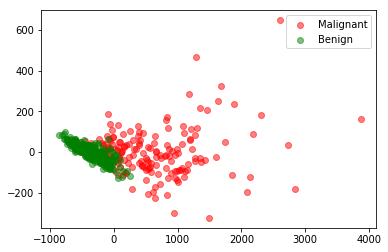

In [6]:
malignant  = pca_value[y_train=='M']
benign = pca_value[y_train=='B']
plt.scatter(malignant[::,0],malignant[::,1],label="Malignant",color="red",alpha=0.5)
plt.scatter(benign[::,0],benign[::,1],label="Benign",color="green",alpha=0.5)
plt.legend(loc="best")
plt.show()

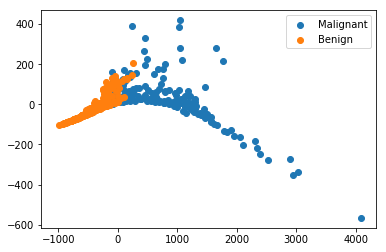

In [7]:
# lets check pca with non-linearity 
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2,n_neighbors=6)
pca_value_iso = isomap.fit_transform(X_train)

malignant_iso  = pca_value_iso[y_train=='M']
benign_iso = pca_value_iso[y_train=='B']
plt.scatter(malignant_iso[::,0],malignant_iso[::,1],label="Malignant")
plt.scatter(benign_iso[::,0],benign_iso[::,1],label="Benign")
plt.legend(loc="best")
plt.show()

In [8]:
# k-folds of data
X_train1,X_test1,y_train1,y_test1=train_test_split(X_train,y_train,test_size=0.30)
X_train2,X_test2,y_train2,y_test2=train_test_split(X_train,y_train,test_size=0.30)
X_train3,X_test3,y_train3,y_test3=train_test_split(X_train,y_train,test_size=0.30)

In [9]:
from sklearn.svm import SVC

In [10]:
for gamma_value in [0.00001,0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]:
    for C_value in[0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000,3000,10000,30000]:
        clf1 = SVC(C = C_value,gamma = gamma_value)
        clf2 = SVC(C = C_value,gamma = gamma_value)
        clf3 = SVC(C = C_value,gamma = gamma_value)

        clf1.fit(X_train1,y_train1)
        clf2.fit(X_train2,y_train2)
        clf3.fit(X_train3,y_train3)

        model1_score = clf1.score(X_train1,y_train1)
        test1_score = clf1.score(X_test1,y_test1)
        model2_score = clf2.score(X_train2,y_train2)
        test2_score = clf2.score(X_test2,y_test2)
        model3_score = clf3.score(X_train3,y_train3)
        test3_score = clf3.score(X_test3,y_test3)

        print 'C=',C_value,' gamma=',gamma_value
        print 'M1 : ',model1_score,' M2 : ',model2_score,' M3 : ',model3_score ,'M avg',(model1_score+model2_score+model3_score)/3 
        print 'T1 : ',test1_score,' T2 : ',test2_score,' T3 : ',test3_score ,'T avg',(test1_score+test2_score+test3_score)/3

C= 0.01  gamma= 1e-05
M1 :  0.638364779874  M2 :  0.619496855346  M3 :  0.635220125786 M avg 0.631027253669
T1 :  0.642335766423  T2 :  0.686131386861  T3 :  0.649635036496 T avg 0.659367396594
C= 0.03  gamma= 1e-05
M1 :  0.915094339623  M2 :  0.915094339623  M3 :  0.915094339623 M avg 0.915094339623
T1 :  0.919708029197  T2 :  0.919708029197  T3 :  0.919708029197 T avg 0.919708029197
C= 0.1  gamma= 1e-05
M1 :  0.924528301887  M2 :  0.927672955975  M3 :  0.933962264151 M avg 0.928721174004
T1 :  0.919708029197  T2 :  0.92700729927  T3 :  0.912408759124 T avg 0.919708029197
C= 0.3  gamma= 1e-05
M1 :  0.930817610063  M2 :  0.930817610063  M3 :  0.937106918239 M avg 0.932914046122
T1 :  0.92700729927  T2 :  0.934306569343  T3 :  0.912408759124 T avg 0.924574209246
C= 1  gamma= 1e-05
M1 :  0.933962264151  M2 :  0.927672955975  M3 :  0.937106918239 M avg 0.932914046122
T1 :  0.92700729927  T2 :  0.941605839416  T3 :  0.912408759124 T avg 0.92700729927
C= 3  gamma= 1e-05
M1 :  0.930817610063

C= 1  gamma= 0.0003
M1 :  0.949685534591  M2 :  0.959119496855  M3 :  0.965408805031 M avg 0.958071278826
T1 :  0.934306569343  T2 :  0.92700729927  T3 :  0.905109489051 T avg 0.922141119221
C= 3  gamma= 0.0003
M1 :  0.965408805031  M2 :  0.974842767296  M3 :  0.977987421384 M avg 0.972746331237
T1 :  0.956204379562  T2 :  0.92700729927  T3 :  0.919708029197 T avg 0.934306569343
C= 10  gamma= 0.0003
M1 :  0.98427672956  M2 :  0.993710691824  M3 :  0.990566037736 M avg 0.989517819706
T1 :  0.963503649635  T2 :  0.905109489051  T3 :  0.912408759124 T avg 0.92700729927
C= 30  gamma= 0.0003
M1 :  0.996855345912  M2 :  0.996855345912  M3 :  0.996855345912 M avg 0.996855345912
T1 :  0.941605839416  T2 :  0.905109489051  T3 :  0.912408759124 T avg 0.919708029197
C= 100  gamma= 0.0003
M1 :  1.0  M2 :  1.0  M3 :  0.996855345912 M avg 0.998951781971
T1 :  0.948905109489  T2 :  0.897810218978  T3 :  0.912408759124 T avg 0.919708029197
C= 300  gamma= 0.0003
M1 :  1.0  M2 :  1.0  M3 :  1.0 M avg 1.

C= 30000  gamma= 0.01
M1 :  1.0  M2 :  1.0  M3 :  1.0 M avg 1.0
T1 :  0.642335766423  T2 :  0.686131386861  T3 :  0.649635036496 T avg 0.659367396594
C= 0.01  gamma= 0.03
M1 :  0.638364779874  M2 :  0.619496855346  M3 :  0.635220125786 M avg 0.631027253669
T1 :  0.642335766423  T2 :  0.686131386861  T3 :  0.649635036496 T avg 0.659367396594
C= 0.03  gamma= 0.03
M1 :  0.638364779874  M2 :  0.619496855346  M3 :  0.635220125786 M avg 0.631027253669
T1 :  0.642335766423  T2 :  0.686131386861  T3 :  0.649635036496 T avg 0.659367396594
C= 0.1  gamma= 0.03
M1 :  0.638364779874  M2 :  0.619496855346  M3 :  0.635220125786 M avg 0.631027253669
T1 :  0.642335766423  T2 :  0.686131386861  T3 :  0.649635036496 T avg 0.659367396594
C= 0.3  gamma= 0.03
M1 :  0.638364779874  M2 :  0.619496855346  M3 :  0.635220125786 M avg 0.631027253669
T1 :  0.642335766423  T2 :  0.686131386861  T3 :  0.649635036496 T avg 0.659367396594
C= 1  gamma= 0.03
M1 :  1.0  M2 :  1.0  M3 :  1.0 M avg 1.0
T1 :  0.642335766423

In [11]:
# main classifier with best value
C_value = 1000
gamma_value = 1e-5
clf = SVC(C=C_value,gamma=gamma_value)
clf.fit(X_train,y_train)
print 'train score : ',clf.score(X_train,y_train)
print 'test score : ',clf.score(X_test,y_test)

train score :  0.975824175824
test score :  0.964912280702
